# 1. Machen Sie sich vertraut mit Matlab


Lesen Sie sich die Kapitel [*Verwendung dieses Buches*](/Modellbildung-und-Simulation/00_einleitung/usage) und [*Erste Schritte in Matlab*](/Modellbildung-und-Simulation/00_einleitung/matlab_00_first_steps) durch. Können Sie die folgenden Fragen beantworten?

1. Beschreiben Sie die Funktionalität des *Command Window*, *Editor* und *Workspace* in Matlab.
1. Was ist der Unterschied zwischen einer Funktion und einem Skript?
2. Was verbirgt sich hinter dem Wort *scope*?
3. Was ist ein *function handle*?
4. Aus welchen Gründen sollte ich for-Schleifen vermeiden?
3. Was ist das Grundprinzip hinter dem *Bisektionsverfahren*?
3. Wie kann ich die Operationen `*` bzw. `^` elementweise ausführen?
3. Warum sollte ich reelle Zahlen nie mit `==` auf Gleichheit prüfen?
3. Was bedeutet logische Indizierung?
3. Wie kann ich eine Matrix transponieren?
3. Warum sollte ich strings nie mit `==` auf Gleichheit prüfen?
3. Nennen Sie ein Tool zur Versionskontrolle.
4. Was bewirkt der Befehl `hold on`?

# 2. Binomialkoeffizienten

Erstellen Sie ein Programm für die Berechnung der Binomialkoeffizienten

$$ \left( \begin{array}{c} n \\ k \end{array} \right) = \frac{n!}{k! \cdot (n-k)!}, $$

wobei $n$ und $k$ ganze Zahlen mit $n \geq k \geq 0$ sind.

**Hinweise**: 

 - Schreiben Sie eine Funktion, die die Fakultät berechnet:

In [1]:
%%file fac.m
% calculate the factorial of an integer n
function z = fac(n)
    
    % test for non ingeger numbers
    if any( abs(n - floor(n)) > 1e-12 )
        error("Input n must be integer.")
    end
    
    % test for nonnegative numbers
    if any( n<0 )
        error("Input n must be nonnegative.")
    end
    
    % initialize output to 1
    z = ones(size(n));
    
    % check if any entry in n is larger than 1. If not,
    % the initialized z is the correct answer and we are 
    % done
    n_greater_one = n>1;
    if ~any(n_greater_one)
        return
    end
    
    % recursively call the factorial function for those entries,
    % that are still greater than one.
    z(n_greater_one) = n(n_greater_one).*fac(n(n_greater_one)-1);
end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/fac.m'.


- Testen Sie die Funktionalität mit der bereitgestellten *test suite* `test_fac.m`, siehe unten. Es reicht zunächst, dass die ersten drei der unit tests erfolgreich sind. **Challenge:** Schaffen Sie es, alle sechs unit tests zu erfüllen?

In [2]:
% test the fac function
moxunit_runtests test_fac.m

suite: 6 tests
......
--------------------------------------------------

OK (passed=6)
ans = 1


 - Schreiben Sie nun die Funktion, die den Binominialkoeffizienten berechnet. Verwenden Sie Ihre neue Funktion zur Berechnung der Fakultät.

In [3]:
%%file binomial_coefficient.m
function c = binomial_coefficient(n,k)
    % ADD CODE HERE
end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/binomial_coefficient.m'.


 - Testen Sie die Funktionsweise Ihrer neuen Funktion (diesmal ohne explizit einen unit test zu verwenden):

In [4]:
% run some quick tests without explicitly using a unit test
binomial_coefficient( 5, 3) % expected value: 10
binomial_coefficient(49, 6) % expected value: 13983816
binomial_coefficient(10,10) % expected value: 1

- Haben Sie Ideen, wie sie die Anzahl nötiger Rechenoperationen verringern können?

# 3. Rundungsfehler

MATLAB bzw. Octave steht für die Auflösung reeller Zahlen die Menge der sogenannten Maschinenzahlen zur Verfügung. Diese haben eine endliche Genauigkeit, welche Sie sich mit dem Befehl

In [5]:
eps

ans =    2.2204e-16


ausgeben lassen können. Bei der Eingabe einer reellen Zahl wird intern eine Maschinenzahl verwendet, die nicht zwangsweise mit dem tatsächlich eingegebenen Wert übereinstimmt. Es entsteht also ein (kleiner) Rundungsfehler im Rahmen der Maschinengenauigkeit.

François Viète hat 1593 als erster ane analytische Gleichung für die Kreiszahl $\pi$ veröffentlicht. Zu diesem Zeitpunkt gab es zwar bereits einige Ansätze $\pi$ zu approximieren, aber seine Darstellung als unendliches Produkt

$$
\begin{align}
a_1 &= \frac{1}{2}\sqrt{2}, \\
a_n &= \frac{1}{2}\sqrt{2+2a_{n-1}}, \text{ für } n \geq 2 
\end{align}
$$

$$ \Rightarrow \frac{2}{\pi} = \lim_{n \to \infty} a_i = a_1 \cdot a_2 \cdot a_3 \cdot ... = \left( \frac{1}{2}\sqrt{2} \right) \cdot \left( \frac{1}{2}\sqrt{2+\sqrt{2}} \right) \cdot \left( \frac{1}{2}\sqrt{2+\sqrt{2 + \sqrt{2}}} \right) \cdot ... $$

war neu. Die Produktformel lässt sich äquivalent als eine Folge schreiben:

$$ 
\begin{align}
z_0 &= 2, \notag \\
z_n &= 2^{n+\frac{1}{2}}\sqrt{1-\sqrt{1-4^{-n}z_{n-1}^2}}, \text{ für } n = 1, 2, 3, ... 
\end{align}
$$

Die Folge konvergiert für $n \to \infty$ gegen $\pi$:

$$ \lim_{n \to \infty} z_n = \pi. $$

Herr Viète konnte damals noch nichts von Computern und den inherent eingebauten Rundungsfehlern wissen. Leider ist gerade seine Folge anfällig für Fehlerfortplanzung, d.h. kleine Rundungsfehler in jedem Iterationsschritt verstärken sich.

Schreiben Sie ein kleines Matlabskript, das diese Fehlerfortplanzung demonstriert. Berechnen Sie dazu für $n=1,2,3,...,20$ jeweils die Folgeglieder $z_n$. Berechnen Sie für jedes $z_n$ den relativen Fehler

$$ r_n = \frac{|\pi - z_n|}{\pi}. $$

Erstellen Sie einen Plot in dem der Logarithmus des relativen Fehlers in Abhängigkeit der Iterationszahl $n$ dargestellt ist. Wie verhält sich der Fehler für kleine beziehungsweise große $n$?

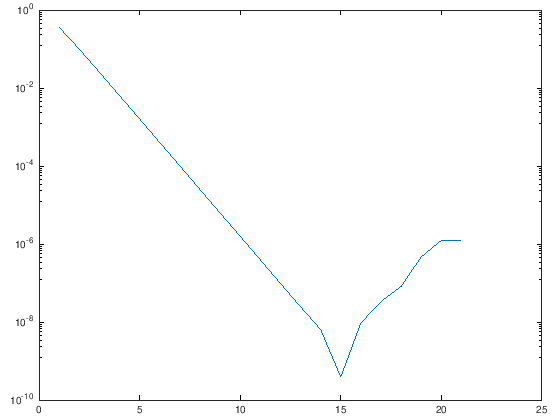

In [6]:
% demonstrate numerical error propagation using Viète's formula for approximating pi

n_max = 20;

z   = zeros(1, n_max+1);
err = zeros(1, n_max+1);

error_func  = @(z) abs(z - pi)/pi;

z(1)   = 2;
err(1) = error_func(z(1));

for n=1:n_max
    z(n+1)   = 2^(n+0.5)*sqrt(1-sqrt(1-4^(-n)*z(n)^2));
    err(n+1) = error_func(z(n+1));
end

semilogy(1:n_max+1,err)
